In [1]:
#import some tools that we will use
import skimage.io
import skimage.measure
import skimage.feature
import skimage.segmentation
from skimage.morphology import disk
import scipy.ndimage
import numpy
import matplotlib.pyplot as plt
from generate_spot_positions import GenerateSpotPositionsJob

import scipy.ndimage

In [2]:
#define paths to image
Image_path = "C:\\Users\\finne\\Documents\\python\\cropped_cells\\AssayPlate_PerkinElmer_CellCarrier-384_B07_T0001F007L01A01ZXXC02_cropped_019.npy"

#Image_path = "/Users/kevin/Desktop/generate_all_maximum_projections_output/Plate1_12-30-20_18-38-45_B02_T0001F001L01A02ZXXC01_maximum_projection.png"

In [3]:
#import and segment image
segmenter = GenerateSpotPositionsJob(Image_path, "blargh", 2.25)

spots = segmenter.spots

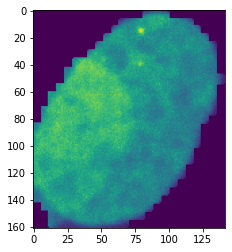

[]


In [4]:
# display image and found spots -- these coordinates (+ offset) can be used to look up precalculated z-position and radial position. 
plt.imshow(segmenter.image)
fig = plt.gcf()
ax = fig.gca()

for spot in spots:
    circle = plt.Circle((spot[1], spot[0]), 7, color='r', alpha=0.3)
    ax.add_patch(circle)

plt.show()

print(spots)

In [ ]:
# use flood to find extent of spot and calculate center of mass
# this sets a tolerance as, essentially, half-maximum intensity: half the difference between the maximum intensity (spot center) and the background (75th percentile).

spot_positions = spots[0:,0:2].astype(int)

markers = numpy.zeros(numpy.shape(image)).astype(int)
for spot in spot_positions:
    marker = skimage.segmentation.flood(image, tuple(spot), tolerance=(image[spot[0],spot[1]] - background)/2)
    markers = marker + markers
    print(scipy.ndimage.center_of_mass(image, marker))


plt.imshow(markers)
plt.show()